<a href="https://colab.research.google.com/github/Praaathaamesh/DL-API-Management/blob/main/DocNotes/TensorFlowAPI_Doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intoroduction to ML Fundamentals

* Initially the AI was set of predefined tool
* Very good AI = Very good rules implemented into it
* Hence, not complex, but can execute complex intellectual tasks
* ML is subset of AI
* ML, rather than us giving program the rules, first figures out the rules for us! may not necessarily get the correct answer every time.
* NN are hyped. Form of ML using layered representation of data. has more than two layers. Multi-stage multi-layer information extraction process.
* Not modelled after the brain!
* Data is really important!
* input = features ; desired output = labels
* Data must be correct.

# Overview

* Tensor = Primary aspect of TF. A vector generalised to higher dimensions. Basically datapoint. Vector can have many dimensions.
* Each tensore represents a partially defined computation that will eventually produce a value.
* Each tensor has a datatype and a shape (Dimensions of data).

## Importing TensorFlow

In [ ]:
import tensorflow as tf
print("The version of TF: ", tf.__version__)

The version of TF:  2.19.0


In [ ]:
x = tf.constant([[1,2,3], [4,5,6]])
print(x)
# Most important attributes of constants are shape and dtype
print(x.shape)
print(x.dtype)
# rank function to fid out rank of the constant tensor variable
print(tf.rank(x))

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
(2, 3)
<dtype: 'int32'>
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
print(x+x)

tf.Tensor(
[[ 2  4  6]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [ ]:
print(5 * x)

tf.Tensor(
[[ 5 10 15]
 [20 25 30]], shape=(2, 3), dtype=int32)


In [ ]:
print(tf.transpose(x))

tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [ ]:
print(tf.concat([x,x,x,x], axis = 0))

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]], shape=(8, 3), dtype=int32)


In [ ]:
tf.nn.softmax([1.,-1.,0.], axis =-1) # Softmax activation function gives numbers whose sum is 1
# multidimensional prediciton aspects

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6652409 , 0.09003057, 0.24472845], dtype=float32)>

In [ ]:
# reduce sum can only be calculated for anything but constants

print(tf.reduce_sum(tf.convert_to_tensor([1,2,3]))) # only tensor input or this is needed a

tf.Tensor(6, shape=(), dtype=int32)


In [ ]:
if tf.config.list_logical_devices("GPU"):
  print("is using the GPU")
else:
  print("is not using the GPU")

is not using the GPU


## Creating Tensors

Below is the example of how to create multiple tensors of different datatypes.

In [ ]:
String = tf.Variable("This is a string", tf.string)
Number = tf.Variable(324, tf.int16)
Floating = tf.Variable(3.55, tf.float64)

In [ ]:
print(String, '\n', Number)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'This is a string'> 
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>


In [ ]:
tfvar = tf.Variable([0.0, 0.0, 0.0]) # Creating the variable
print(tfvar, '\n')

tfvar.assign([9.9, 9.9, 9.9]) # assigning the tensor elemenet of same dimensions
print(tfvar, '\n')

tfvar.assign_add([0.1,0.1,0.1]) # adding the tensor elements to the pre-existing tensor
print(tfvar, '\n')


<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)> 

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([9.9, 9.9, 9.9], dtype=float32)> 

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([10., 10., 10.], dtype=float32)> 



## Automatic Differentiation/Derivations

In [ ]:
# Define a function for variable xvar
xvar = tf.Variable(1.0)
def f(x):
  y = x**2 + 2*x - 5
  return y
print(f(xvar))

# Differentiate the function w.r.t xvar
with tf.GradientTape() as tape:
  Diff = tape.gradient(f(xvar), xvar)
print(Diff)

tf.Tensor(-2.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


## Rank/Degree of Tensors

Number of dimensions involved in a tensor. The tensor of rank 0 is a scalar. Rank 1 is a vector and anything above rank 2 is a matrix.

In [ ]:
R1_tensor = tf.Variable(['A'], tf.string)
R2_tensor = tf.Variable([['A'],['B']], tf.string)

In [ ]:
print(R1_tensor, '\n', R2_tensor)

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'A'], dtype=object)> 
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=string, numpy=
array([[b'A'],
       [b'B']], dtype=object)>


In [ ]:
print(tf.rank(R1_tensor))
print(tf.rank(R2_tensor))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


## Shape of a tensor

How many items we have in each dimensions.

In [ ]:
print(tf.shape(R1_tensor))
print(tf.shape(R2_tensor))

tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([2 1], shape=(2,), dtype=int32)


In [ ]:
# Alternatively by using shape method directly
print(R1_tensor.shape)
print(R2_tensor.shape)

(1,)
(2, 1)


## Changing shape of a Tensor

We will do it alot of times. Number of elements of a tensor is product of sizes of all its shapes.

In [ ]:
OneTensor = tf.ones([1,2,3]) # creates a tensor of shape [1,2,3] of ones.
print(OneTensor)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [ ]:
# reshape it in [2,3,1]
TwoTensor = tf.reshape(OneTensor, [2, 3, 1])
print(TwoTensor)

tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)


In [ ]:
# reshape it in [3, -1]
# -1 tells the tensor to calculate the size of the tensor in that place
ThreeTensor = tf.reshape(TwoTensor, [3, -1])
print(ThreeTensor)

'''
New shape will be [3,2], because here TwoTensor has 6 elements
3 defines the number of lists and -1 tells to take the sutable shape automatically
'''

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


'\nNew shape will be [3,2], because here TwoTensor has 6 elements\n3 defines the number of lists and -1 tells to take the sutable shape automatically\n'

## Types of Tensors

**Variable, Constant, Placeholder, SparseTensor**.
All of them are immutable; not the Variable

In [ ]:
# Let us look at a Constant
C1 = tf.constant(1, tf.int16)
print(C1)

tf.Tensor(1, shape=(), dtype=int16)


# Everything Tensors

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# [2] = scalar (no rows or columns, hence rank 0)
# [2.0, 4.4, 7.2] = vector (linear array, hence rank 1)
# [[[2.5, 6.8, 1.8], [2.5, 6.8, 1.8]], [[2.5, 6.8, 1.8], [3.3, 6.9, 2.1]]] = 3D matrix (2 rows 3 columns, hence rank 3) Could be multidimensional
# [[2.2, 3.4],[2.3, 6.7]] = 2D matrix (2 rows 2 columns, hence rank 2)
# number of columns == rank
# Tensors could contain float, int, complex and even strings

In [ ]:
# create first tensor
TensorConstant_rank0 = tf.constant(3.0)
print(TensorConstant_rank0)
# default is float32 dtype

tf.Tensor(3.0, shape=(), dtype=float32)


In [ ]:
# create rank 1 tensor
TensorConstant_rank1 = tf.constant([2.0, 4.4, 8.2])
print(TensorConstant_rank1)

tf.Tensor([2.  4.4 8.2], shape=(3,), dtype=float32)


In [ ]:
# create rank 2 tensor
TensorConstant_rank2 = tf.constant([[2.2, 3.4],[2.3, 6.7]])
print(TensorConstant_rank2)

tf.Tensor(
[[2.2 3.4]
 [2.3 6.7]], shape=(2, 2), dtype=float32)


In [ ]:
# Tensors can have arbitrary number of axes or dimensions

TensorConstant_rank3 = tf.constant([[[2.5, 6.8, 1.8], [2.5, 6.8, 1.8]], [[2.5, 6.8, 1.8], [3.3, 6.9, 2.1]]])
print(TensorConstant_rank3)

tf.Tensor(
[[[2.5 6.8 1.8]
  [2.5 6.8 1.8]]

 [[2.5 6.8 1.8]
  [3.3 6.9 2.1]]], shape=(2, 2, 3), dtype=float32)


In [ ]:
# Arithematic operations (element wise addition/substraction/multiplication, matrix multiplication)

a = tf.constant([[[2.5, 4.9], [0.3,3.3]], [[7.0, 2.0], [1.0, 2.7]]])
b = tf.constant([[[2.5, 4.9], [0.3,3.3]], [[7.0, 2.0], [1.0, 2.7]]])

print(a + b, '\n')
print(a - b, '\n')
print(a * b, '\n')
print(a @ b, '\n')

print(tf.add(a, b))
print(tf.multiply(a, b))
print(tf.matmul(a, b))

tf.Tensor(
[[[ 5.   9.8]
  [ 0.6  6.6]]

 [[14.   4. ]
  [ 2.   5.4]]], shape=(2, 2, 2), dtype=float32) 

tf.Tensor(
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]], shape=(2, 2, 2), dtype=float32) 

tf.Tensor(
[[[ 6.25      24.01     ]
  [ 0.09      10.889999 ]]

 [[49.         4.       ]
  [ 1.         7.2900004]]], shape=(2, 2, 2), dtype=float32) 

tf.Tensor(
[[[ 7.7200003 28.42     ]
  [ 1.74      12.36     ]]

 [[51.        19.4      ]
  [ 9.7        9.290001 ]]], shape=(2, 2, 2), dtype=float32) 

tf.Tensor(
[[[ 5.   9.8]
  [ 0.6  6.6]]

 [[14.   4. ]
  [ 2.   5.4]]], shape=(2, 2, 2), dtype=float32)
tf.Tensor(
[[[ 6.25      24.01     ]
  [ 0.09      10.889999 ]]

 [[49.         4.       ]
  [ 1.         7.2900004]]], shape=(2, 2, 2), dtype=float32)
tf.Tensor(
[[[ 7.7200003 28.42     ]
  [ 1.74      12.36     ]]

 [[51.        19.4      ]
  [ 9.7        9.290001 ]]], shape=(2, 2, 2), dtype=float32)


In [ ]:
# finding largest element in the tensor

print(tf.reduce_max(b), '\n')
print(tf.math.argmax(b), '\n')
print(tf.nn.softmax(b), '\n')

tf.Tensor(7.0, shape=(), dtype=float32) 

tf.Tensor(
[[1 0]
 [1 0]], shape=(2, 2), dtype=int64) 

tf.Tensor(
[[[0.08317269 0.9168273 ]
  [0.04742588 0.95257413]]

 [[0.9933072  0.00669285]
  [0.15446527 0.8455348 ]]], shape=(2, 2, 2), dtype=float32) 



In [ ]:
# converting np.array into a tensor

c = tf.convert_to_tensor(np.array([[2.5, 4.9], [0.3,3.3]]))
print(c)

tf.Tensor(
[[2.5 4.9]
 [0.3 3.3]], shape=(2, 2), dtype=float64)


In [ ]:
# Shape, rank, axis/dim, size of tensors

ZeroTensor = tf.zeros([3,2,4,2]) # here 3: batch, 2:rows, 4:columns, 2:features
print(ZeroTensor)

print("Datatype of every element: ", ZeroTensor.dtype)
print("dimensions or axes are: ", ZeroTensor.ndim)
print("Rank is: ", tf.rank(ZeroTensor))
print("Shape is: ", ZeroTensor.shape)
print("size is : ", tf.size(ZeroTensor).numpy()) # product of shape elements

tf.Tensor(
[[[[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]]], shape=(3, 2, 4, 2), dtype=float32)
Datatype of every element:  <dtype: 'float32'>
dimensions or axes are:  4
Rank is:  tf.Tensor(4, shape=(), dtype=int32)
Shape is:  (3, 2, 4, 2)
size is :  48


In [ ]:
# Indexing

# single axis indexing
print(TensorConstant_rank1)
print(TensorConstant_rank1[0]) # an element; axis not preserved
print(TensorConstant_rank1[2:7]) # a range; axis preserved
print(TensorConstant_rank1[2:7:2]) # one other element
print(TensorConstant_rank1[::-1]) # reverse

# multiaxis indexing
print(TensorConstant_rank2[0, :])
print(TensorConstant_rank2[: , 1])
print(TensorConstant_rank2[1, 1])

tf.Tensor([2.  4.4 8.2], shape=(3,), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor([8.2], shape=(1,), dtype=float32)
tf.Tensor([8.2], shape=(1,), dtype=float32)
tf.Tensor([8.2 4.4 2. ], shape=(3,), dtype=float32)
tf.Tensor([2.2 3.4], shape=(2,), dtype=float32)
tf.Tensor([3.4 6.7], shape=(2,), dtype=float32)
tf.Tensor(6.7, shape=(), dtype=float32)


In [ ]:
# Shape manipulation

print(tf.shape(TensorConstant_rank3))
ReshapedTensor = tf.reshape(TensorConstant_rank3, [6,-1])
print(ReshapedTensor)

tf.Tensor([2 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[2.5 6.8]
 [1.8 2.5]
 [6.8 1.8]
 [2.5 6.8]
 [1.8 3.3]
 [6.9 2.1]], shape=(6, 2), dtype=float32)


In [ ]:
# typecasting

Float32Tensor = tf.constant([2.0, 4.4, 8.9])
Float16Tensor = tf.cast(Float32Tensor, dtype = tf.float16)
print(Float16Tensor, '\n')
UintTensor = tf.cast(Float16Tensor, dtype = tf.uint8)
print(UintTensor, '\n')

# Broadcasting

print(Float32Tensor * 2) # Basically scalar arthematics operators on all the elements of the tensor

tf.Tensor([2.  4.4 8.9], shape=(3,), dtype=float16) 

tf.Tensor([2 4 8], shape=(3,), dtype=uint8) 

tf.Tensor([ 4.   8.8 17.8], shape=(3,), dtype=float32)


In [ ]:
# Special Tensors

# 1) Ragged Tensors = variable number of elements along the axis

RaggedList = [[2,4,5],[2,4],[1]]
RaggedTensor = tf.ragged.constant(RaggedList)
print(RaggedTensor)

# 2) Sparse Tensors = sparse data, spaces/gaps in the data

SprsTensor = tf.sparse.SparseTensor(indices = [[0,0], [1,2]], values = [1,2], dense_shape = [3,4]) # has 3 rows and 4 columns at (0,0) and (1,2) 1 and 2 is stored, respectively
print(SprsTensor)

DenseTensor = tf.sparse.to_dense(SprsTensor)
print(DenseTensor)

# 3) String Vectors = can e split, converted and decoded into unicode, string tensor of numbers can be converted to the int tensor

StringList = ["This", "is", "a", "string"]
StringTensor = tf.constant(StringList)
print(StringTensor)

<tf.RaggedTensor [[2, 4, 5], [2, 4], [1]]>
SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))
tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)
tf.Tensor([b'This' b'is' b'a' b'string'], shape=(4,), dtype=string)


# Everything Variables

In [ ]:
# Creating a tensor variable

MyTensor  = tf.constant([[2.4, 5.6, 2.2],[22.3, 6.7, 8.9]])
MyVariable = tf.Variable(MyTensor)
print(MyVariable)

# could be off all types just like tensors
Myvariable = tf.Variable([[True, False],[True, False]])
print(Myvariable)

# All the arithematic operations like tensors, reshaping creates a new tensor; does not update the pre-existing tensor
# No resizing when assign method is used; only same dimension variables can be assigned

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.4,  5.6,  2.2],
       [22.3,  6.7,  8.9]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=bool, numpy=
array([[ True, False],
       [ True, False]])>


In [ ]:
# Lifecycle, naming and watching

a = tf.Variable(MyTensor, name = "Mark") # both backed up by the same tensor
b = tf.Variable(MyTensor+1,  name = "Mark") # broadcasting the scalar addition
# element-wise unequal, yet the same name
print(a==b)

tf.Tensor(
[[False False False]
 [False False False]], shape=(2, 3), dtype=bool)


In [ ]:
# Placing variables and tensors

# most variables are placed in GPU if availible, since it actively chooses fastest device compatible with its datatype
# hence use
'''
with tf.device("CPU:0"):
  or
with tf.device("GPU:0"):
'''

'\nwith tf.device("CPU:0"):\n  or\nwith tf.device("GPU:0"):\n'

# Automatic Differentiation and Gradients

In [ ]:
# Useful for backpropagation algorithms in NN
# for automatic differentiation, TensorFlow requires oprations occured in both FP and BP in order to traverse in a reverse direction to compute the gradients
# Gradient Tapes API.
  # TF keeps the records or "Tapes" of operations done in tf.GradientTape() --> it then uses these "tapes" to compute gradients by using reverse mode differentiation
  # Inputs are in form of tf.Variable

newVar = tf.Variable(3.6) # varibale declared
with tf.GradientTape() as tape: # recorded operations/functions
  y = newVar**2
dy_dx = tape.gradient(y, newVar) # calculating the gradient of the target operation (mostly loss) relative to some source (maybe a parameter in model)
print(dy_dx.numpy())

7.2


In [ ]:
import math

# Example 1: using y = (x**2) + x + 5
# Example 2: using y = (4(x**3)/3)- x + 2(math.exp(x))
X = tf.Variable(3.0) # For now lets keep it scalar
with tf.GradientTape(persistent=True) as Tape: # can calculate multiple gradients
  Y = (X**2) + X + 5
  Z = ((4/3) * (X**3)) - X - (2 * math.exp(X))
  Q = 2 * ((1/(X ** 1/2))) + (X ** 1/2)
ExGrad = Tape.gradient(Y, X)
ExGrad1 = Tape.gradient(Z, X)
ExGrad2 = Tape.gradient(Q, X)

print(ExGrad2.numpy())

# footnote: if you are dealing with tensor (not scalar),
#           then use differentiable variables in a dictionary and then calculate the gradient
#           make sure the declaration name and the dictionary key is same!

0.055555552


In [ ]:
# Using tf.GradientTape() over any tensor; but scalar

Weights = tf.Variable(tf.random.normal(shape = (3,2)), name = 'w')
Biases = tf.Variable(tf.zeros(shape = (2, ), dtype = tf.float32), name = 'b')
xVar = [[3.0,4.6,9.2]]

with tf.GradientTape() as Tape:
  y = (xVar @ Weights) + Biases
  Loss = tf.reduce_mean(y**2) # tf.reduce_mean(inputTensor, axis = 0 by column or 1 by row) calculates the mean via dimensions

'''
passing explicitly
[dl_dw, dl_db] = Tape.gradient(Loss, [Weights, Biases])
print([dl_dw, dl_db]) # dl_dw will have same shape as Weights (applies for all the gradients)

OR

passing via dictionary
'''
Variables = {
    'w' : Weights,
    'b' : Biases
}

Grad = Tape.gradient(Loss, Variables)
print(Grad['b'])

tf.Tensor([-13.13342   11.921021], shape=(2,), dtype=float32)


In [ ]:
# gradients w. r. t. models

Layer = tf.keras.layers.Dense(2, activation="relu")
xVar = tf.constant([[2.3, 5.6, 7.8]]) # Declare inputs after declaring the layers

with tf.GradientTape() as Tape:
  # forwards pass
  y = Layer(xVar)
  Loss = tf.reduce_mean(y**2)

# Backwards pass
Grad = Tape.gradient(Loss, Layer.trainable_variables)

for ele1, ele2 in zip(Layer.trainable_variables, Grad): # zip funtion zips the sequential elements in a tuple.
  print(f"{ele1.name}, shape:  {ele2.shape}")

kernel, shape:  (3, 2)
bias, shape:  (2,)


In [ ]:
# Controlling the tape's behaviour (What it watches)

'''
default behaviour is to record all the operations, why?, because:
  - tape needs to know what to record
  - tape holds the reference to intermediate outputs (to avoid recording of unnecessary operations)
  - basic case tape does: calculate the gradient of loss with respect to one of the trainable variable_accessed
'''

TrainableVar = tf.Variable(4.0)
Non_TrainableVar1 = tf.Variable(3.4, trainable = False)
Non_TrainableVar2 = tf.Variable(2.3) + 1.0
Non_TrainableVar3 = tf.constant(4.0)

with tf.GradientTape() as Tape:
  y = (TrainableVar **2) + (Non_TrainableVar1 **2) + (Non_TrainableVar2 **2) + (Non_TrainableVar3 **2)

Grad = Tape.gradient(y, [TrainableVar, Non_TrainableVar1, Non_TrainableVar2, Non_TrainableVar3])
print(Grad)


[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>, None, None, None]


In [ ]:
# tf.GradientTape() by default watches all the variables; you can customise it!

x0 = tf.Variable(3.5)
x1 = tf.Variable(4.9)

with tf.GradientTape(watch_accessed_variables=False) as Tape: # Default behaviour is stopped
  Tape.watch(x1) # Specific gradient will be calculated for x1 only since its the only one under the watch
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1) # smooth approximation of relu, only takes posiitve values in consideration
  y = y0 + y1
  ys = tf.reduce_sum(y) # no MSE calculated - no large errors and no need to penalise them

Grad = Tape.gradient(ys, [x0, x1])
print(Grad[0], '\n', Grad[1])


None 
 tf.Tensor(0.9926085, shape=(), dtype=float32)


In [ ]:
# Intermediate results

# you can watch and request gradient outputs for intermediate values calculated inside the tape

x0 = tf.constant(3.0)

with tf.GradientTape() as Tape:
  Tape.watch(x0)
  y = x0*x0
  z = y*y

# Calculating z with respect to y
Grad = Tape.gradient(z, y)
print(Grad)

tf.Tensor(18.0, shape=(), dtype=float32)


In [ ]:
# once you call Tape.gradient(source, difffactor),resources held by tape are gone.
# to calculate multiple gradients in one block use this

x0 = tf.constant([1.0, 3.0])
with tf.GradientTape(persistent = True) as Tape: # use persistent as True
  Tape.watch(x0)
  y = x0*x0
  z = y*y

Grad1 = Tape.gradient(z, x0)
Grad2 = Tape.gradient(y, x0)

print(Grad1, '\n', Grad2)

tf.Tensor([  4. 108.], shape=(2,), dtype=float32) 
 tf.Tensor([2. 6.], shape=(2,), dtype=float32)


In [ ]:
# Tape's gone

del Tape

# Performance Notes

In [ ]:
# at persistent = True all the intermediate calculations are stored, hence higher memory usage
# when the gradient of multiple targets are requested

x0 = tf.Variable(2.3)
with tf.GradientTape(persistent = True) as Tape:
  y0 = x0 ** 2
  y1 = 1/x0

print(Tape.gradient(y0,x0))
print(Tape.gradient(y1,x0))

# gradients of the sum OR sum of the gradients
print(Tape.gradient({'y0': y0, 'y1': y1},x0))
# gradient of sum is calculated for non-scalars y = x * [3.4, 5.7] and x is variable with 0 rank

# cases when gradient returns None:
'''
- when target is not connected to the source
- doing calculation outside tensorflow
- replacing variable with a tensor
- taking gradients as int or str
- stateful object's current states are seen not the history lead to it
'''

tf.Tensor(4.6, shape=(), dtype=float32)
tf.Tensor(-0.18903592, shape=(), dtype=float32)
tf.Tensor(4.410964, shape=(), dtype=float32)


"\n- when target is not connected to the source\n- doing calculation outside tensorflow\n- replacing variable with a tensor\n- taking gradients as int or str\n- stateful object's current states are seen not the history lead to it\n"

In [ ]:
# Sometimes it is better to return zeros instead of None

x = tf.Variable([2.2, 2.2])
y = tf.Variable(3, )
with tf.GradientTape() as Tape:
  z = y ** 2
print(Tape.gradient(z, x, unconnected_gradients= tf.UnconnectedGradients.ZERO))

tf.Tensor([0. 0.], shape=(2,), dtype=float32)


# Graphs and Functions

In [ ]:
# what are the "graphs"?

'''
- Eager execution: line-by-line in Python; Graph execution: in type of graph "tf.Graph"
- tf.graph = has operations (units of computation) and tensor objects (units of data that flow within these operations)
- You can visualise these graphs via TensorBoard; and can be used in environments without python interpreter (mobile apps, embedded devices, backend servers)
- saving format : "Saved models"; subsequent exporting via Python
- extremly useful, fast, ran in parallel and run efficiently on multiple devices.
'''

# import important libraries
from datetime import datetime

In [ ]:
# creating functions

# define a simple python function
def RegFunction(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# Polymorphic function creation using tf.function
GraphFunction = tf.function(RegFunction)

# input tensors
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [4.0]])
b1 = tf.constant(4.0)

# call original function
OGcall = RegFunction(x1, y1, b1).numpy()
# TF graph function call
GraphCall = GraphFunction(x1, y1, b1).numpy()
assert(OGcall == GraphCall) # if condition is False; assertion error is thrown


In [ ]:
# tf.function applies to a function and all other functions it calls

def InnerFunction(x, y, b):
  x = tf.matmul(x, y)
  x = x+b
  return x

@tf.function # wrapper/decorator; a polymorphic function that morphs the normal functions
def OuterFunction(x):
  y = tf.constant([[2.0], [4.0]])
  b = tf.constant(4.0)
  return InnerFunction(x, y, b)

# calling out the functions is "The first step of graph creation"
OuterFunction(tf.constant([[1.3, 4.5]])).numpy()

array([[24.6]], dtype=float32)

In [ ]:
# Converting python functions into graphs

'''
Contains both tf.Operations and python code logic
so tf.function library called "tf.autograph" converts python code into graph-generating code
'''

def SimpleReLu(x):
  if tf.greater(x,0):
    return x
  else:
    return 0

TFSimpleReLu = tf.function(SimpleReLu)

print("First branch, with graph: ", TFSimpleReLu(tf.constant(1).numpy()))
print("Second branch, with graph: ", TFSimpleReLu(tf.constant(-1).numpy()))

# Graph-generating output
#print(tf.autograph.to_code(SimpleReLu))


First branch, with graph:  tf.Tensor(1, shape=(), dtype=int32)
Second branch, with graph:  tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
# Viewing the graph
print(TFSimpleReLu.get_concrete_function(tf.constant(2)).graph.as_graph_def())


node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
}
node {
  name: "Greater/y"
  op: "Const"
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 0
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "Greater"
  op: "Greater"
  input: "x"
  input: "Greater/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "cond"
  op: "StatelessIf"
  input: "Greater"
  input: "x"
  attr {
    key: "then_branch"
    value {
      func {
        name: "cond_true_562"
      }
    }
  }
  attr {
    key: "output_shapes"
    value {
      list {
        shape {
        }
        shape {
        }
      }
    }
  }
  attr {
    key: "else_branch"
   

In [ ]:
# Polymorphism: one tf.function -- many graphs

# tf.function creates different output graph with different datatype of input argument

@tf.function
def ReLu(x):
  return tf.maximum(0.0, x)

print(ReLu(tf.constant(2.3)))
print(ReLu(tf.constant([[2.3,5.6],[8.6,2.6]])))
# if alrady the same type id called, then no graphs are created again
print(ReLu(tf.constant(2.3))) # no graph for this is created cuz already encountered it!


tf.Tensor(2.3, shape=(), dtype=float32)
tf.Tensor(
[[2.3 5.6]
 [8.6 2.6]], shape=(2, 2), dtype=float32)
tf.Tensor(2.3, shape=(), dtype=float32)


In [ ]:
# actual use case tf.function

# define function
@tf.function
def MSE(y0, y1):
  SqDiff = tf.pow(y0-y1, 2)
  return tf.reduce_mean(SqDiff)

# Getting tensor inputs
Y0 = tf.random.uniform([5], maxval=10, dtype=tf.int32)
Y1 = tf.random.uniform([5], maxval=10, dtype=tf.int32)
print(MSE(Y0, Y1))

# Making eager execution
tf.config.run_functions_eagerly(True)
print(MSE(Y0, Y1))

# stopping eager execution
tf.config.run_functions_eagerly(False)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
# Tracing:- creation of the graph in the order of execution
#         - captures operations into the graph

@tf.function
def MSE(y0, y1):
  print("allo")
  SqDiff = tf.pow(y0-y1, 2)
  return tf.reduce_mean(SqDiff)

CallFunc = MSE(Y0, Y1)
CallFunc = MSE(Y0, Y1)
CallFunc = MSE(Y0, Y1)

'''
explaination:
- print function is not captured in the graph.
- tf.function ran it once, saw it wasn't a graph generating operation, never executed again
'''

allo


"\nexplaination:\n- print function is not captured in the graph.\n- tf.function ran it once, saw it wasn't a graph generating operation, never executed again\n"

In [ ]:
# call them eagerly
tf.config.run_functions_eagerly(True)
CallFunc = MSE (Y0, Y1)
CallFunc = MSE (Y0, Y1)
CallFunc = MSE (Y0, Y1)

allo
allo
allo


In [ ]:
# Non-strict execution:- necessary operations (operations which produce observable effects) are executed
# opposite of the eager execution

def UnseenEagerFunction(x):
  tf.gather(x, [1])
  return x # ignored previous operation

try:
  print(UnseenEagerFunction(tf.constant([0.0])))
except tf.errors.InvalidArgumentError as e:
  print("Error")

# error is raised since it is "Eager operation"; no error if it was graph constructing

Error


# Everything Models, Layers and Modules

## **TensorFlow Models**: creation, loading, execution and saving

In [ ]:
# import important modules

import keras
from datetime import datetime

In [ ]:
# First clear up the basics of OOPs

class ModuleFunctionality:
  def __init__(self): # self instance attributes
    self.cardinal1 = tf.Variable([[1.2, 2.3]])
    self.cardinal2 = tf.Variable([[8.2, 2.9]])
    self.cardinal3 = tf.Variable([[9.2, 5.3]])

  def CallSuperior(self):
    return (self.cardinal1 + self.cardinal2) * self.cardinal3


class ModuleFunctionality2(ModuleFunctionality):
  def __init__(self):
    super().__init__()
  def CallSuperior2(self):
    return (super().CallSuperior())

ModularityObject = ModuleFunctionality2()
print(ModularityObject.CallSuperior().numpy())

[[86.479996 27.56    ]]


In [ ]:
# Let us experiment with the super keyword and hierarchial relationship of classes

class classCodec:
  def __init__(self):
    self.codec1 = tf.Variable([[2.5, 4.6]])
    self.codec2 = tf.Variable([[0.5, 4.0]])

  def CodecOp(self):
    return (self.codec1 + self.codec2)

ObjCodec = classCodec()
print(ObjCodec.CodecOp().numpy())

[[3.  8.6]]


In [ ]:
# Creation of simple module

'''
modules/extensions are deep learning terminologies of Obj in TF
can store the function, input or any object
use case:- creation of FCL in DL model is done in a module; custom module is required
'''

class SimpleModule(tf.Module):
  def __init__(self, name = None):
    super().__init__(name = name)
    self.TrainVar = tf.Variable(3.7, name = "Trainable variable in this module")
    self.UnTrainVar = tf.Variable(7.8, trainable = False, name = "Non-trainable variable in this module")
# can toggle trainability; especially during fine tuning, freezing layer and dropout
  def __call__(self, xinp): # another parameter;
                            # mention attribute while instantiating the object

    return self.TrainVar * xinp + self.UnTrainVar

SimpleModuleObject = SimpleModule(name = "CreationFirst")
print(SimpleModuleObject(tf.constant(0.9)).numpy())

11.13


In [ ]:
# printing trainable variables

print(SimpleModuleObject.trainable_variables) # mention the created object not the class design

(<tf.Variable 'Trainable variable in this module:0' shape=() dtype=float32, numpy=3.700000047683716>,)


In [ ]:
# creating and calling a bilinear dense layer model out of modules

class Dense(tf.Module):
  def __init__(self, Inpfeat, Outfeat, name = None): # input and output features
    super().__init__(name = name)
    self.W = tf.Variable(tf.random.normal([Inpfeat, Outfeat]), name = "W")
    self.B = tf.Variable(tf.zeros([Outfeat]), name = "B")
# forward pass:- calculating the activation using activation function
  def __call__(self, X0):
    Y = tf.matmul(X0, self.W) + self.B
    return tf.nn.relu(Y)

class Seqlayer(tf.Module): # Creating the sequential layer
  def __init__(self, name = None):
    super().__init__(name = name)
    self.Denselayer1 = Dense(Inpfeat = 3, Outfeat = 3)
    self.Denselayer2 = Dense(Inpfeat = 3, Outfeat = 2)

  def __call__(self, X0):
    X0 = self.Denselayer1(X0)
    return self.Denselayer2(X0)

# creating object
Model1 = Seqlayer(name = "The_Model") # the name must be a valdi identifier
print(f"These are the model results: {Model1(tf.constant([[2.4, 2.7, 3.6]]))}")



These are the model results: [[0.        0.3901045]]


In [ ]:
# printing the submodules
print(Model1.submodules)

# printing all of the variables
[print(i, '\n') for i in Model1.variables]

(<__main__.Dense object at 0x7f18759667e0>, <__main__.Dense object at 0x7f1875966060>)
<tf.Variable 'B:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)> 

<tf.Variable 'W:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.655239  , -0.7906698 ,  0.00676947],
       [-0.547157  , -0.5569847 , -0.11925808],
       [ 0.34196427,  0.3164401 ,  0.07018065]], dtype=float32)> 

<tf.Variable 'B:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)> 

<tf.Variable 'W:0' shape=(3, 2) dtype=float32, numpy=
array([[-1.3128257 ,  0.29412523],
       [-0.58154505,  0.7054874 ],
       [-1.3829682 , -0.23948003]], dtype=float32)> 



[None, None, None, None]

In [ ]:
# Example: creating custom module



# it sets the parameters up as instance attributes
# it calculates the output as instance method
class DenseCalc(tf.Module):
  def __init__(self, In, Out, name = None):
    super().__init__(name = name)
    self.W = tf.Variable(tf.random.normal([In, Out], name = 'W'))
    self.B = tf.zeros([Out], name = "B")

  def CalcAct(self, x):
    Y = (self.W * x) + self.B
    return tf.nn.relu(Y)

MyObj = DenseCalc(1, 3) # not calling any method; just declaring instance attributes
# no error

# call the method with suitable arguments
print(MyObj.CalcAct(tf.constant([[2.3, 4.5, 3.3]])))


tf.Tensor([[1.2862445 0.        0.4753863]], shape=(1, 3), dtype=float32)


In [ ]:
# Creating variables in the first call and Only specifying the number of output features

class Setup(tf.Module):
  def __init__(self, Out, name = None):
    super().__init__(name = name)
    self.isbuild = False
    self.Out = Out
  def __call__(self, x): # __call__ is important
    if not self.isbuild:
      self.w = tf.Variable(tf.random.normal([x.shape[-1], self.Out]), name = 'w')
      self.b = tf.Variable(tf.zeros([self.Out]), name = 'b')
      self.isbuild = True

    Y = tf.matmul(x, self.w) + self.b
    return tf.nn.relu(Y)

class FinalLayers(tf.Module):
  def __init__(self, name = None):
    super().__init__(name = name)
    self.Dense1 = Setup(Out=3)
    self.Dense2 = Setup(Out=2)

  def __call__(self, x):
    x = self.Dense1(x)
    return self.Dense2(x)


DemoObj = FinalLayers(name = "trail")
print(DemoObj(tf.constant([[2.3, 2.3, 4.4]])))

# footnote:- here the __call__ method makes the instance attributes behave like a function

tf.Tensor([[0.         0.15773125]], shape=(1, 2), dtype=float32)


In [ ]:
# Saving Functions

'''
- The graphs save functions and ops.
- TF is capable of running models without og python objects
- use graphs to tell TF to do operations in og python, without its og code
'''


class FinalLayers(tf.Module):
  def __init__(self, name = None):
    super().__init__(name = name)
    self.Dense1 = Setup(Out=3)
    self.Dense2 = Setup(Out=2)

  @tf.function # decorator for making the base code operations as a graph
  def __call__(self, x):
    x = self.Dense1(x)
    return self.Dense2(x)


DemoObj = FinalLayers(name = "trail")

# footnote:- works same as before;
# each signature is passed in function --> separate graph is created

print(DemoObj(tf.constant([[2.3, 2.3, 4.4]])))
print(DemoObj(tf.constant([[[2.3, 2.3, 4.4], [2.3, 2.3, 4.4]]])))


tf.Tensor([[0.7302979  0.17195863]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[[0.7302979  0.17195863]
  [0.7302979  0.17195863]]], shape=(1, 2, 2), dtype=float32)


In [ ]:
# Saving the models

'''
- best for sharing completely trained models
- has all the collection of weights and fucntions
- creates a file named .pb (protocol buffer), describing the functional tf.Graph
'''

tf.saved_model.save(DemoObj, "saved_model")


In [ ]:
# Loading the model

LoadMod = tf.saved_model.load("saved_model")

In [ ]:
# restoring and using model

print(DemoObj(tf.constant([[2.0,2.0,2.0]]))) # calling the fucntion normally

# Footnote:- input signatures defined cant be changed

tf.Tensor([[3.7339342  0.87920576]], shape=(1, 2), dtype=float32)


## **Keras Models**: creation, loading, execution and saving

In [ ]:
# learn how keras uses tf.Module and is much more efficient
import keras

In [ ]:
# Keras Layers

'''
- tf.keras.layers.Layer:- base class for all keras layer; inherits form tf.Module!
- just change tf.Module to tf.keras.layers.Layer and __call__ to call
- intialise with keywords args to keep other many kera layer arguments
'''

# Method 1 :- with specifying both input signatures

class DenseCalc(tf.keras.layers.Layer):
  def __init__(self, In, Out, **kwargs):
    super().__init__(**kwargs)
    self.weight = tf.Variable(tf.random.normal([In, Out]), name = 'w')
    self.bias = tf.Variable(tf.zeros([Out]), name = 'b')

  def call(self, x):
    Y = tf.matmul(x, self.weight) + self.bias
    return tf.nn.relu(Y)

OnelayerModel = DenseCalc(name = "One_Layer_Model", In = 3, Out = 3 )

print(OnelayerModel(tf.constant([[2.0,2.0,2.0]])))

tf.Tensor([[0.        1.0731897 2.297532 ]], shape=(1, 3), dtype=float32)


In [ ]:
# Method 2 :- with specifying only one signature (Number of Output Features)

class DenseCalc(tf.keras.layers.Layer):
  def __init__(self, Out, **kwargs):
    super().__init__(**kwargs)
    self.Out = Out

  def build(self, In): # build and call are reserved keywords
    self.w =  tf.Variable(tf.random.normal([In[-1], self.Out]), name = 'w')
    self.b = tf.Variable(tf.zeros([self.Out]), name = 'b')

  def call(self, inputs):
    Y = tf.matmul(inputs, self.w) + self.b
    return tf.nn.relu(Y)

FlexibleModel = DenseCalc(name = "Flexible_Model", Out = 3)
print(FlexibleModel(tf.constant([[2.0,2.0,2.0]])))

tf.Tensor([[5.141865  1.9790626 0.       ]], shape=(1, 3), dtype=float32)


In [ ]:
# Keras models

'''
- Basically nested keras layers or a class named "tf.keras.Model" (inherits from tf.keras.layers.Layer)
- this class can also be nested
- better functionality and performance with ability to train it on multiple machines
'''

# describing the architecture

@keras.saving.register_keras_serializable() # decorator for custom keras obj (mdoel, act, layer); correct saving and storage
class ArchDes(tf.keras.Model):
  def __init__(self, name = None, **kwargs):
    super().__init__(**kwargs)
    self.DL1 = DenseCalc(Out = 3)
    self.DL2 = DenseCalc(Out = 2)

  def call(self, inputs):
    inputs = self.DL1(inputs)
    return self.DL2(inputs)

KerasSimpleModel = ArchDes(name = "First_keras_model")
print(KerasSimpleModel(tf.constant([[2.0, 4.6, 7.9]])))


tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)


In [ ]:
# Saving the model

KerasSimpleModel.save("keras_model.keras")

In [ ]:
# Loadign the model

NewModel = tf.keras.models.load_model("keras_model.keras")


In [ ]:
# Restoring and Using the model

print(NewModel(tf.constant([[2.0, 2.9, 9.5]])))

tf.Tensor([[0.       8.692691]], shape=(1, 2), dtype=float32)


# Training Loops

In [ ]:
import matplotlib.pyplot as plt

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
# prop_cycle to change the colour of the plot

In [ ]:
# Approaching ML problems

'''
get data --> define model --> define L --> calculate activation and L -->
calculate gradient for L --> fit the gradients for all the paras using optimisers
--> evaluate the results
'''

# Problem 1:- Simple Linear Regression :- Input/output/target :- everythings a tensor


'\nget data --> define model --> define L --> calculate activation and L -->\ncalculate gradient for L --> fit the gradients for all the paras using optimisers\n--> evaluate the results\n'

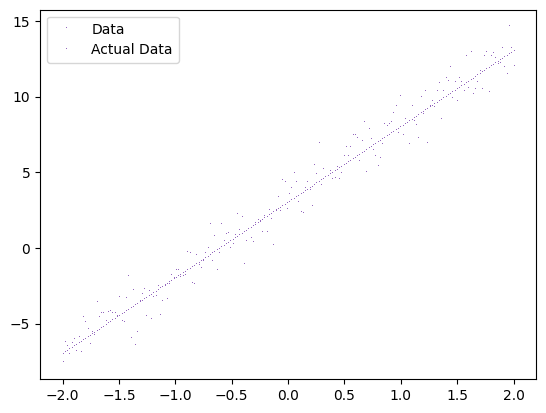

In [ ]:
# Generating supervised learning data with gaussian noise

ActualW = 5.0
ActualB = 3.0 # actual parameters

NumExamples = 200

# Now we will generate x first (vector of 200 random evenly spaced values from -2 to 2)
X = tf.linspace(-2, 2, NumExamples)
X = tf.cast(X, tf.float32) # casting all the ints into tf.float32

# define function to calulate Y
def f(X):
  return (X * ActualW) + ActualB

# Create some noise
Noise = tf.random.normal(shape=[NumExamples])

# Calculate the actual y and add some noise
Y = f(X) + Noise

# calculate the loss
def LossEval(T, YPred):
  return tf.reduce_mean(tf.square(T - YPred))

# Plot the data
plt.plot(X, Y, ',', color= colours[4], label="Data")
plt.plot(X, f(X), ',', color= colours[4], label="Actual Data")
plt.legend()
plt.show()

# Footnote:- Tensors are usually treated on the batches/groups/inps and outps stacked together
# Here small dataset hence do it in a single block

good going


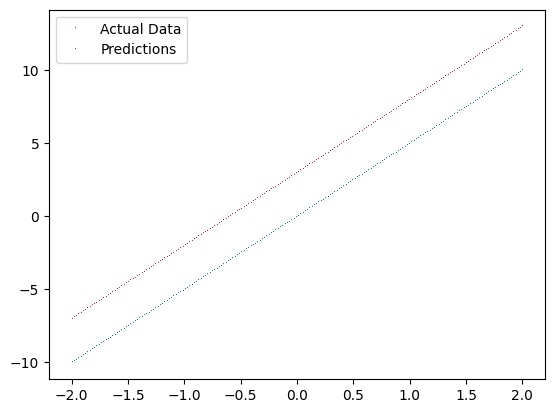

The loss is  10.8 %


In [ ]:
# Create demo SLR model

class DemoModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.weight = tf.Variable(5.0)
    self.bias = tf.Variable(0.0) # usually random; not static like this one

  def __call__(self, x):
    return (self.weight * x) + self.bias

SLRDemo = DemoModel(name = "My_model")

try:
  assert SLRDemo(tf.constant(3.0)) == 15.0
  print("good going")
except AssertionError:
  print("Yeh toh hona hi tha!")

# Plot the actual predictions
plt.plot(X, f(X), ',', color= colours[3], label="Actual Data")
plt.plot(X, SLRDemo(X), ',', label = "Predictions")
plt.legend()
plt.show()

# Calculate the loss
print(f"The loss is {LossEval(Y, SLRDemo(X)).numpy() : .1f} %")

# Footnote:- to roundup use f"{expression : .**decimals required**f}"

In [ ]:
# Defining a training loop using Keras

# using previously made training dataset named 'X'!
class KerasTLModel(tf.keras.Model):

  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # these paras here are static, usually contantly changing
    self.weight = tf.Variable(5.0)
    self.bias = tf.Variable(0.0)

  def call(self, x):
    return (self.weight * x) + self.bias

AutoTLModel = KerasTLModel()

# compile the training set parameters
AutoTLModel.compile(run_eagerly = False,
                    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
                    loss = tf.keras.losses.MeanSquaredError(reduction = "sum_over_batch_size"))
print(X.shape[0])

# actually fitting the models
AutoTLModel.fit(X, Y, epochs = 10, batch_size = X.shape[0])

200
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 10.7958
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 10.7958
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 10.7958
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 10.7958
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 10.7958
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 10.7958
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 10.7958
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 10.7958
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 10.7958
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 10.7958
